<a href="https://colab.research.google.com/github/Katta-Gowtham/ZomatoEDA/blob/main/AISC2007_1_GE3_Group2_denoising_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!unzip /content/facedetectionDS.zip -d /content/

In [2]:
base_dir = '/content/facedetectionDS'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

## Loading and Preprocess the Data

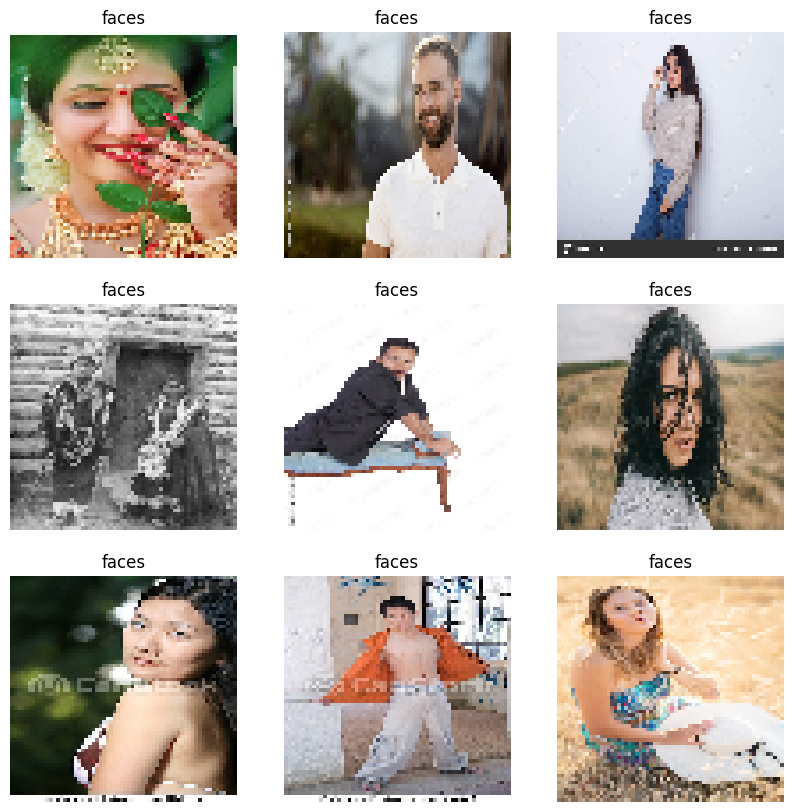

In [3]:
# Function to load and preprocess images
def load_images(directory, size=(64, 64)):
    images = []
    labels = []  # assuming you need labels for classification tasks later
    for label in os.listdir(directory):
        path = os.path.join(directory, label)
        for file in os.listdir(path):
            image_path = os.path.join(path, file)
            image = load_img(image_path, target_size=size)
            image = img_to_array(image)
            image /= 255.0  # normalize to [0, 1]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images
images, labels = load_images(base_dir)

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()


In [4]:
# Split the data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

## Training the Autoencoder

In [5]:
# Encoder
input_img = Input(shape=(64, 64, 3))  # Adjust based on your image size
x = Flatten()(input_img)
encoded = Dense(128, activation='relu')(x)

# Decoder
x = Dense(64 * 64 * 3, activation='sigmoid')(encoded)
decoded = Reshape((64, 64, 3))(x)

# Autoencoder
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(train_images, train_images, epochs=10, batch_size=256, validation_data=(test_images, test_images))


Epoch 1/10
22/22 [==============================] - 6s 258ms/step - loss: 0.0816 - val_loss: 0.0675
Epoch 2/10
22/22 [==============================] - 4s 189ms/step - loss: 0.0612 - val_loss: 0.0571
Epoch 3/10
22/22 [==============================] - 4s 192ms/step - loss: 0.0521 - val_loss: 0.0500
Epoch 4/10
22/22 [==============================] - 5s 240ms/step - loss: 0.0454 - val_loss: 0.0442
Epoch 5/10
22/22 [==============================] - 4s 190ms/step - loss: 0.0403 - val_loss: 0.0403
Epoch 6/10
22/22 [==============================] - 4s 188ms/step - loss: 0.0365 - val_loss: 0.0368
Epoch 7/10
22/22 [==============================] - 5s 253ms/step - loss: 0.0335 - val_loss: 0.0342
Epoch 8/10
22/22 [==============================] - 4s 189ms/step - loss: 0.0318 - val_loss: 0.0340
Epoch 9/10
22/22 [==============================] - 4s 191ms/step - loss: 0.0305 - val_loss: 0.0329
Epoch 10/10
22/22 [==============================] - 5s 239ms/step - loss: 0.0288 - val_loss: 0.0302

In [6]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 12288)             1585152   
                                                                 
 reshape (Reshape)           (None, 64, 64, 3)         0         
                                                                 
Total params: 3,158,144
Trainable params: 3,158,144
Non-trainable params: 0
_________________________________________________________________


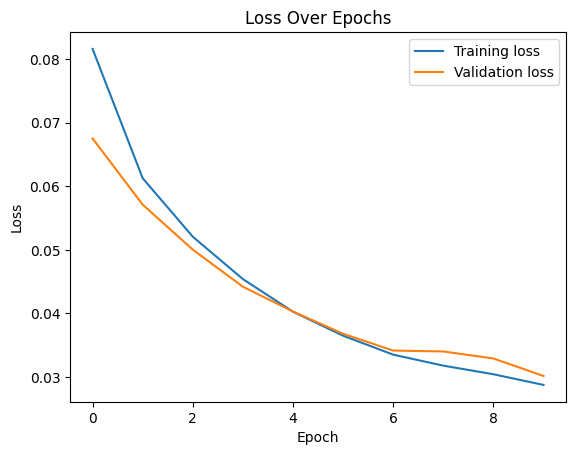

In [7]:
# 'history' contains the training history of the model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

44/44 [==============================] - 1s 11ms/step


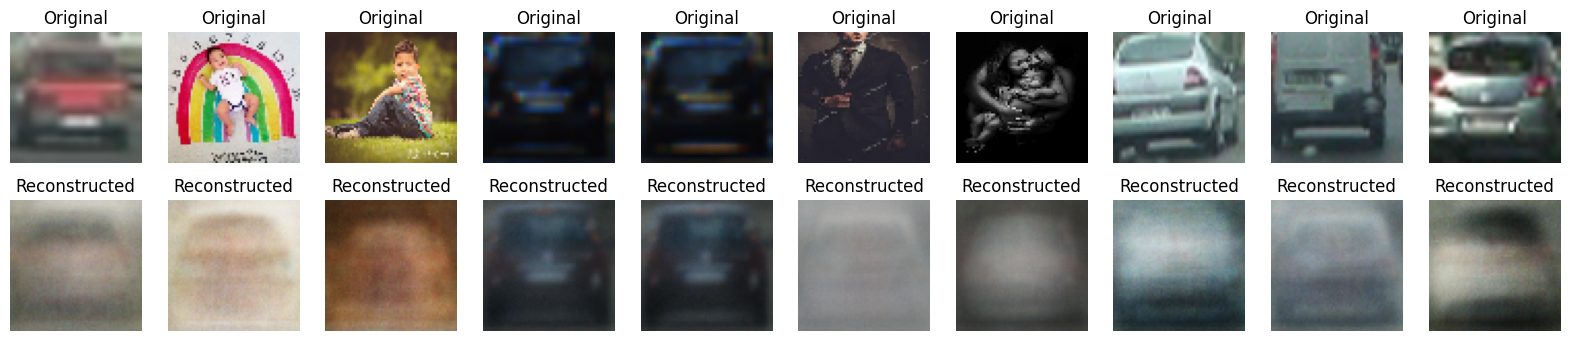

In [8]:
# Predicting on the test set
decoded_imgs = autoencoder.predict(test_images)

# Ploting original and reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

## Denoising Autoencoder

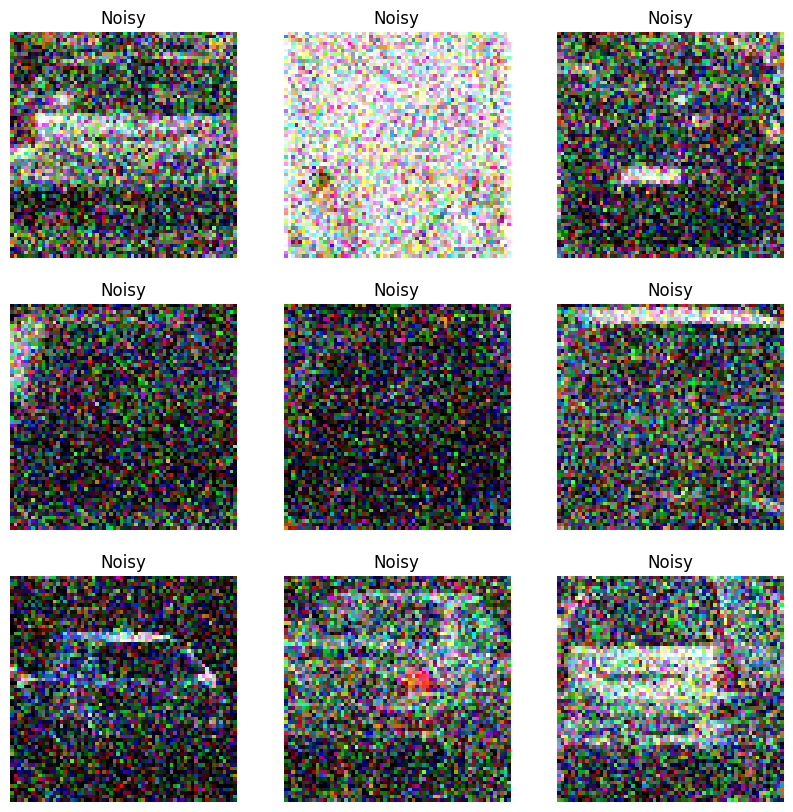

In [9]:
def add_noise(images, noise_factor=0.3):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Adding noise to the training and test images
train_images_noisy = add_noise(train_images)
test_images_noisy = add_noise(test_images)

# Plotting noisy images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images_noisy[i])
    plt.title("Noisy")
    plt.axis('off')
plt.show()

In [10]:
# Training the autoencoder using noisy images but validate with clean images
history = autoencoder.fit(train_images_noisy, train_images, epochs=10, batch_size=256, validation_data=(test_images_noisy, test_images))


Epoch 1/10
22/22 [==============================] - 5s 222ms/step - loss: 0.0374 - val_loss: 0.0358
Epoch 2/10
22/22 [==============================] - 4s 191ms/step - loss: 0.0313 - val_loss: 0.0359
Epoch 3/10
22/22 [==============================] - 6s 279ms/step - loss: 0.0296 - val_loss: 0.0334
Epoch 4/10
22/22 [==============================] - 4s 188ms/step - loss: 0.0287 - val_loss: 0.0348
Epoch 5/10
22/22 [==============================] - 4s 187ms/step - loss: 0.0266 - val_loss: 0.0316
Epoch 6/10
22/22 [==============================] - 5s 238ms/step - loss: 0.0241 - val_loss: 0.0309
Epoch 7/10
22/22 [==============================] - 4s 189ms/step - loss: 0.0230 - val_loss: 0.0301
Epoch 8/10
22/22 [==============================] - 4s 201ms/step - loss: 0.0221 - val_loss: 0.0302
Epoch 9/10
22/22 [==============================] - 5s 230ms/step - loss: 0.0226 - val_loss: 0.0304
Epoch 10/10
22/22 [==============================] - 4s 187ms/step - loss: 0.0222 - val_loss: 0.0310

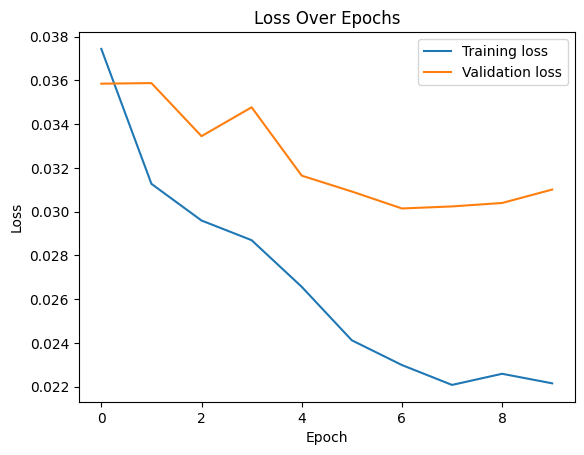

In [11]:
# 'history' contains the training history of the model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Model Evaluation and Visualization

44/44 [==============================] - 0s 11ms/step


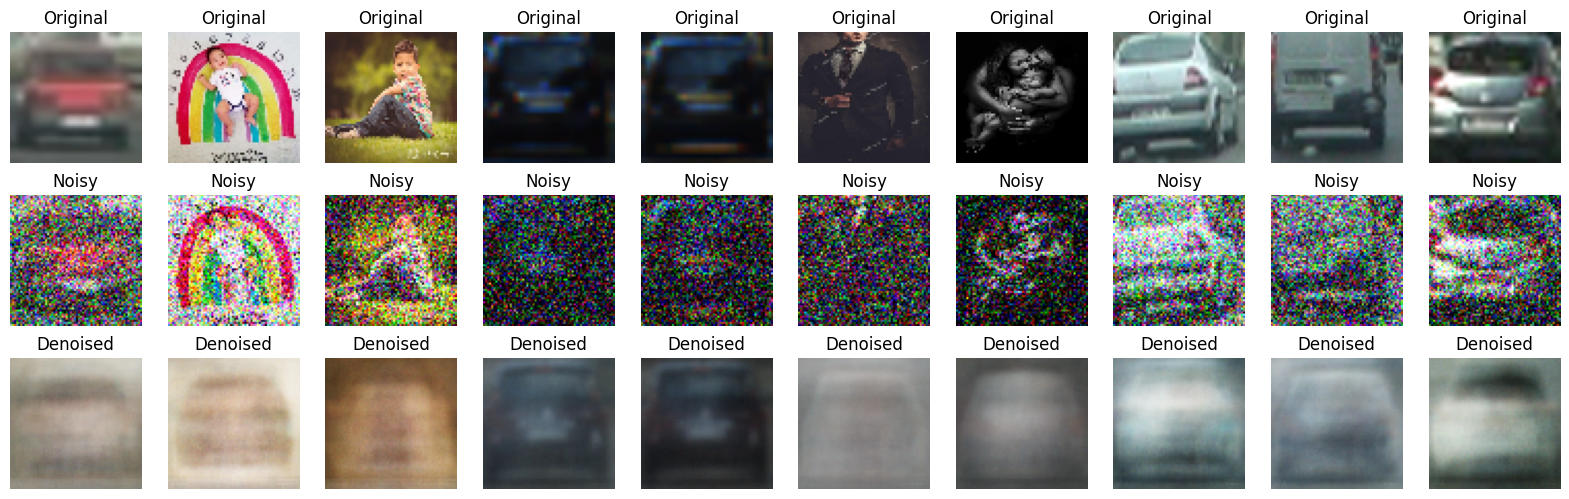

In [12]:
# Use the trained model to denoise the test images
denoised_images = autoencoder.predict(test_images_noisy)

# Plot original, noisy, and denoised images
n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(test_images_noisy[i])
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_images[i])
    plt.title("Denoised")
    plt.axis('off')
plt.show()


In [13]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
history = autoencoder.fit(train_images_noisy, train_images, epochs=50, batch_size=256, validation_data=(test_images_noisy, test_images), callbacks=[early_stopping])


Epoch 1/50
22/22 [==============================] - 4s 195ms/step - loss: 0.0199 - val_loss: 0.0291
Epoch 2/50
22/22 [==============================] - 4s 200ms/step - loss: 0.0192 - val_loss: 0.0304
Epoch 3/50
22/22 [==============================] - 5s 239ms/step - loss: 0.0195 - val_loss: 0.0300
Epoch 4/50
22/22 [==============================] - 4s 188ms/step - loss: 0.0183 - val_loss: 0.0292
Epoch 5/50
22/22 [==============================] - 4s 188ms/step - loss: 0.0176 - val_loss: 0.0281
Epoch 6/50
22/22 [==============================] - 5s 237ms/step - loss: 0.0174 - val_loss: 0.0292
Epoch 7/50
22/22 [==============================] - 4s 187ms/step - loss: 0.0173 - val_loss: 0.0280
Epoch 8/50
22/22 [==============================] - 4s 186ms/step - loss: 0.0167 - val_loss: 0.0277
Epoch 9/50
22/22 [==============================] - 5s 236ms/step - loss: 0.0163 - val_loss: 0.0278
Epoch 10/50
22/22 [==============================] - 4s 188ms/step - loss: 0.0161 - val_loss: 0.0300

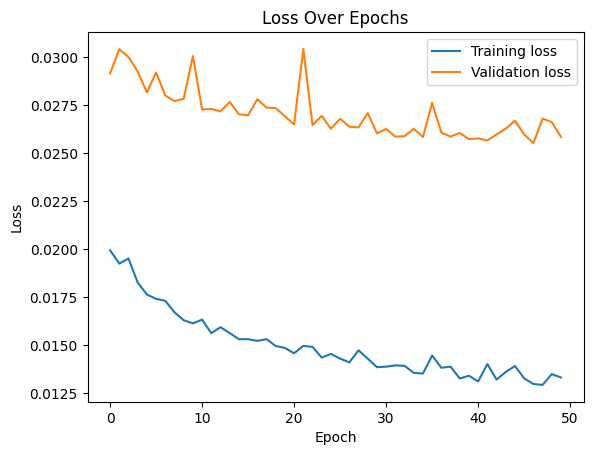

In [14]:
#'history' contains the training history of the model
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
